# Figure 7 - Tidal gravity
HD 209458b

In [14]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils import constants as const
from wind_ae.wrapper.wrapper_utils.plots import energy_plot
import matplotlib.patches as mpatches
import pandas as pd

import matplotlib.pyplot as plt
from wind_ae.wrapper.wrapper_utils.plots import _custom_rc_params
import matplotlib.ticker as ticker
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Populate Arrays for plotting

In [ ]:
#Old star
sim = wind_sim()
semimajor = np.array([0.03,0.05,0.1,0.2,0.3,0.4])
mdots = np.zeros_like(semimajor)
fluxes = np.zeros_like(semimajor)
eff = np.zeros_like(semimajor)
for i,a in enumerate(semimajor):
    try:
        sim.load_uservars('data/Tidal/209_%.2fau.csv'%a)
    except FileNotFoundError:
        continue

    mdots[i] = sim.windsoln.Mdot
    fluxes[i] = sim.windsoln.Ftot
    eff[i] = sim.windsoln.eff_heat   

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


/Users/m/Research/wind-ae/wind_ae/wrapper/wrapper_utils/windsoln.py:1243: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  self.R_cori = optimize.fsolve(


         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


/Users/m/Research/wind-ae/wind_ae/wrapper/wrapper_utils/windsoln.py:1243: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  self.R_cori = optimize.fsolve(


         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


In [ ]:
#young star
sim = wind_sim()
semimajor2 = np.array([0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
mdots2 = np.zeros_like(semimajor2)
fluxes2 = np.zeros_like(semimajor2)
eff2= np.zeros_like(semimajor2)
for i,a in enumerate(semimajor2):
    try:
        sim.load_uservars('data/Tidal/209_hi_%.2fau.csv'%a)
    except FileNotFoundError:
        continue

    mdots2[i] = sim.windsoln.Mdot
    fluxes2[i] = sim.windsoln.Ftot
    eff2[i] = sim.windsoln.eff_heat

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


In [ ]:
#Constant distance
mdots_const = np.zeros(6)
fluxes_const = np.zeros(6)
for i,F in enumerate(np.arange(1,7)):
    flux=10**F
    sim.load_uservars(f'data/Tidal/209_{flux:.0f}F.csv')
    mdots_const[i] = sim.windsoln.Mdot
    fluxes_const[i] = sim.windsoln.Ftot

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


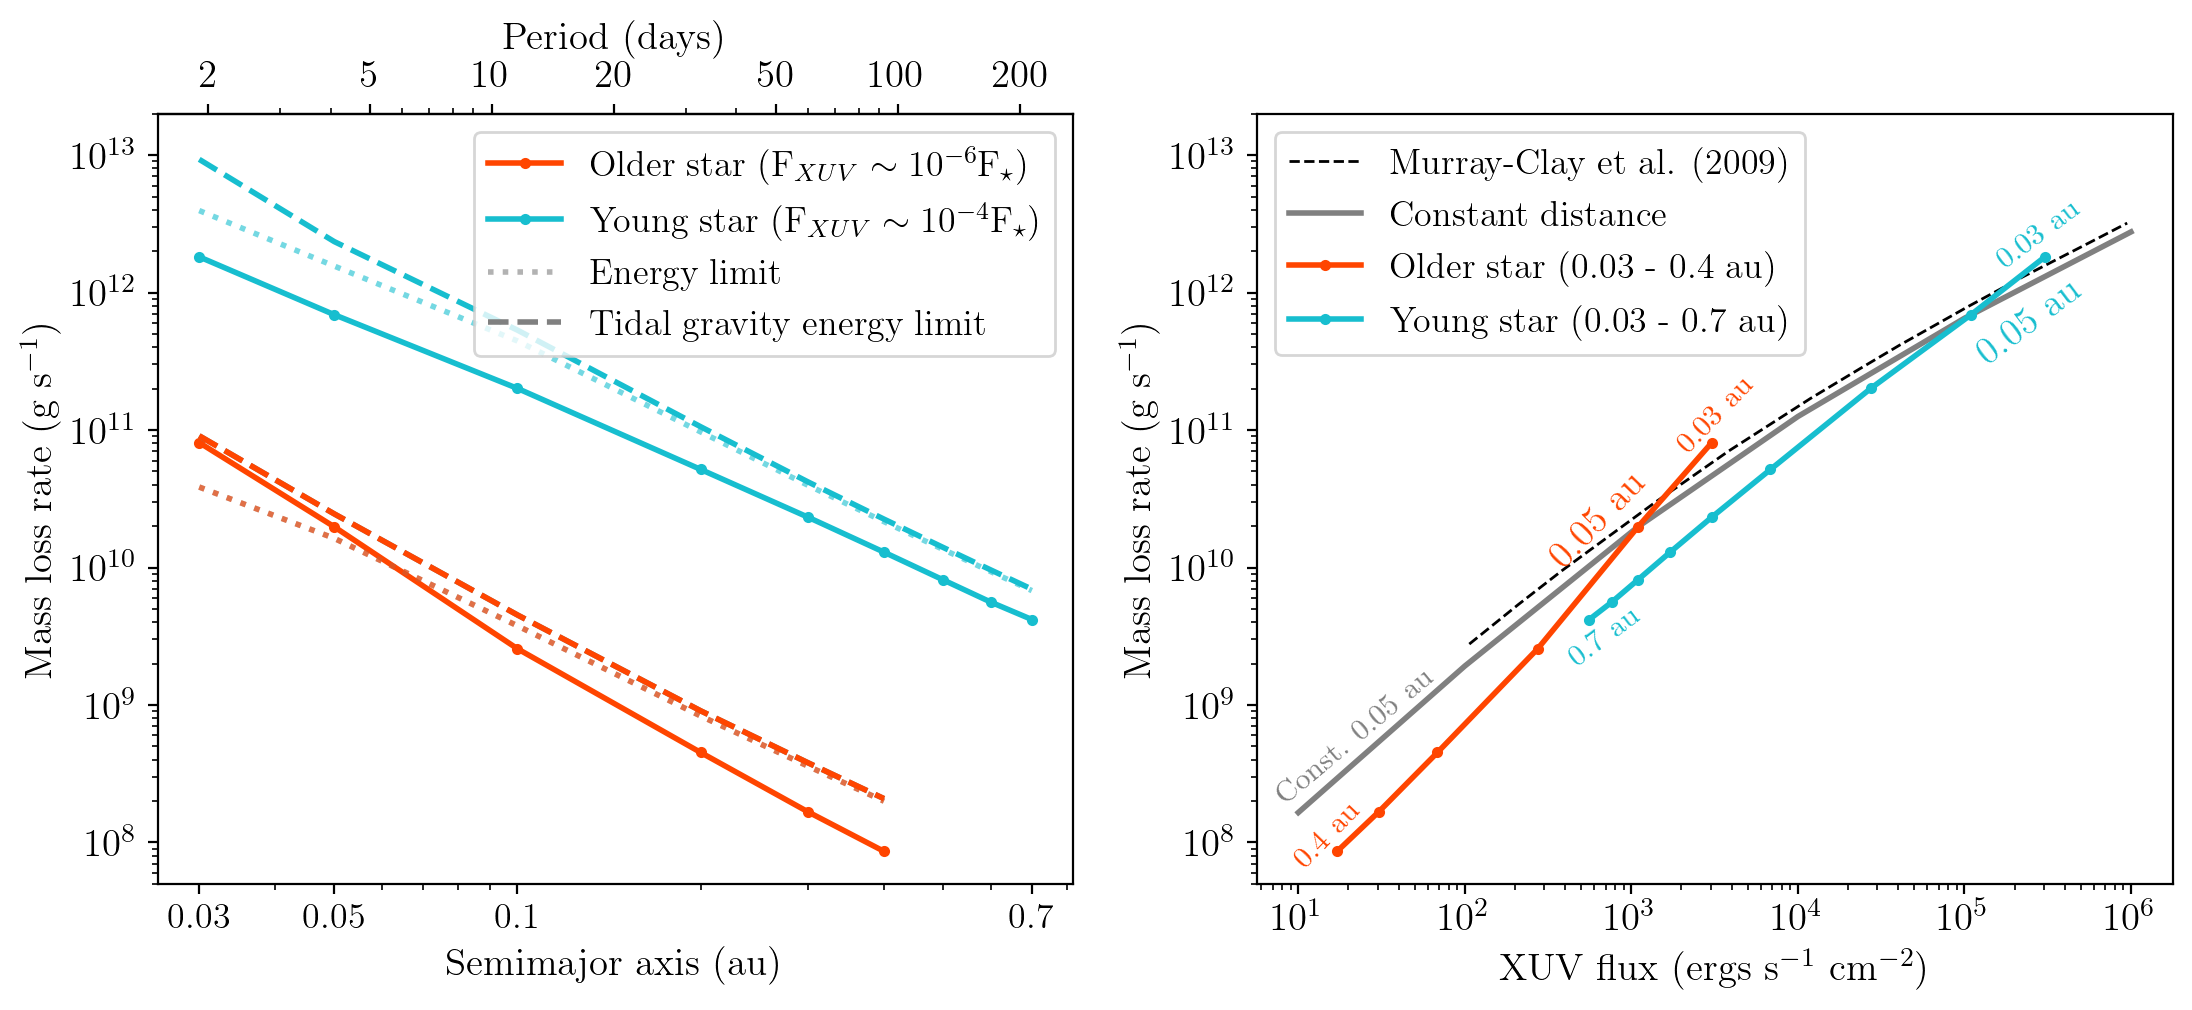

In [ ]:

def energy_limit(efficiency,fluxes):
    return efficiency*fluxes*np.pi*sim.windsoln.Rp**3 / (const.G*sim.windsoln.Mp)
def erkaev_limit(efficiency,fluxes,a):
    r_hill = a*const.au*(sim.windsoln.Mp/(3.*sim.windsoln.Mstar))**(1./3.)
    epsilon = r_hill/sim.windsoln.Rp #in units of Rp, so already /Rp
    correction = (1 - 3/(2*epsilon) - 1/(2*epsilon**3))**(-1)
    return energy_limit(efficiency,fluxes)*correction

def a2period(semimajor):
    return np.sqrt(4*np.pi**2 * (semimajor*const.au)**3 / (const.G*sim.windsoln.Mstar))/86400
def period2a(semimajor):
    return semimajor

fig,ax = plt.subplots(1,2,figsize=(13,5))

plt.subplot(121)
old_color   = 'orangered'
young_color = 'tab:cyan'
ax[0].plot(semimajor,mdots,marker='.',c=old_color,lw=2,label=r'Older star (F$_{XUV} \sim 10^{-6}$F$_{\star}$)')
ax[0].plot(semimajor2,mdots2,marker='.',c=young_color,lw=2,label=r'Young star (F$_{XUV} \sim 10^{-4}$F$_{\star}$)')
ax[0].plot(semimajor,energy_limit(eff,fluxes),c='grey',lw=2,ls=':',alpha=0.6,label=r'Energy limit')
ax[0].plot(semimajor,erkaev_limit(eff,fluxes,semimajor),c='grey',lw=2,ls='--',label=r'Tidal gravity energy limit')

ax[0].plot(semimajor,energy_limit(eff,fluxes),c=old_color,lw=2,ls=':',alpha=0.6)
# plt.plot(semimajor,erkaev_limit(0.3,fluxes,semimajor),c='darkmagenta',alpha=0.3,lw=2,ls=':',label=r'Energy limit, $\epsilon$=%.1f'%0.3)
ax[0].plot(semimajor,erkaev_limit(eff,fluxes,semimajor),c=old_color,lw=2,ls='--')
# plt.plot(semimajor,erkaev_limit(0.6,fluxes,semimajor),c='k',lw=2,ls=':',label=r'Erkaev limit, $\epsilon$=%.1f'%0.3)

ax[0].plot(semimajor2,energy_limit(eff2,fluxes2),c=young_color,lw=2,ls=':',alpha=0.6)
# plt.plot(semimajor2,energy_limit(0.3,fluxes2),c='gold',lw=2,ls=':')
ax[0].plot(semimajor2,erkaev_limit(eff2,fluxes2,semimajor2),c=young_color,lw=2,ls='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semimajor axis (au)')
plt.ylabel(r'Mass loss rate (g s$^{-1}$)')
# plt.xlim(0,0.75)
plt.ylim(5e7,2e13)
plt.xticks([0.03,0.05,0.1,0.7],labels=['0.03','0.05','0.1','0.7'],fontsize=13)
plt.legend(fontsize=13)
secax = ax[0].secondary_xaxis('top', functions=(a2period,period2a))
# ticks = np.array([1.89,4.08,11.55,32.67,92.417,
#        213.94873919])
ticks = [2,5,10,20,50,100,200]
secax.set_xticks(ticks,[str(int(x)) for x in ticks])
secax.set_xlabel('Period (days)')

plt.subplot(122)

data = pd.read_csv('data/Tidal/og.dat')
ax[1].loglog(data['mc09_fluxes'],data['mc09_mdots']/3,label='Murray-Clay et al. (2009)',c='k',ls='--',lw=1)
ax[1].loglog(fluxes_const,mdots_const,label='Constant distance',c='grey',ls='-',lw=2)
plt.loglog(fluxes,mdots,label='Older star (0.03 - 0.4 au)',marker='.',c=old_color,lw=2)
plt.loglog(fluxes2,mdots2,label='Young star (0.03 - 0.7 au)',marker='.',c=young_color,lw=2)

plt.ylim(5e7,2e13)
plt.ylabel('Mass loss rate (g s$^{-1}$)',fontsize=14)
plt.xlabel('XUV flux (ergs s$^{-1}$ cm$^{-2}$)',fontsize=14)
plt.legend(fontsize=13)

plt.text(1.5e5,1.5e12,'0.03 au',c=young_color,fontsize=11,rotation=37)
plt.text(4e2,1.9e9,'0.7 au',c=young_color,fontsize=11,rotation=37)
plt.text(1.1e5,3e11,'0.05 au',c=young_color,fontsize=14,rotation=37)

plt.text(7e0,1.9e8,'Const. 0.05 au',c='grey',fontsize=11,rotation=40)

plt.text(1.8e3,6.8e10,'0.03 au',c=old_color,fontsize=11,rotation=46)
plt.text(9e0,6.5e7,'0.4 au',c=old_color,fontsize=11,rotation=46)
plt.text(3e2,1e10,'0.05 au',c=old_color,fontsize=14,rotation=46)

# plt.savefig('../Figures/Final/Mdot_vs_Flux.pdf',dpi=500,facecolor='white',
#             bbox_inches='tight')
plt.show()